# Example of optimizing a convex function

# Goal is to test the objective values found by HyperOpt

# Benchmarking test with different iterations for serial executions

In [17]:
# def get_param_dict():
#     param_dict = {"learning_rate": uniform(0, 1),
#               "gamma": uniform(0, 5),
#               "max_depth": range(1,10),
#               "n_estimators": range(1,300),
#                "booster":['gbtree','gblinear','dart']
#              }
#     return param_dict

In [18]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

space = {
            'gamma': hp.uniform('gamma', 0.1, 4),
            'C': hp.loguniform('C', -7, 0)
                
        }

In [19]:
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score

iris = datasets.load_iris()

# Take only the first two features.
X = iris.data[:,:2]
Y = iris.target

def objective(args_list):
    global X,Y
    
    clf = svm.SVC(**args_list)
    result  = cross_val_score(clf, X, Y, scoring='accuracy').mean()
    
    return {'loss': -1.0*result, 'status': STATUS_OK }


In [20]:
Store_Optimal_X = []
Store_Results = []
num_of_tries = 20

In [21]:

#Since 5 random were tried in Bayesian, here we add 5 extra

import warnings
warnings.filterwarnings("ignore")

for i in range(num_of_tries):
    
    trials = Trials()
    best_10 = fmin(fn=objective, space=space, algo=tpe.suggest, trials=trials, max_evals=15)
    best_10 = -1.0*min(trials.losses())
    
    trials = Trials()
    best_20 = fmin(fn=objective, space=space, algo=tpe.suggest, trials=trials, max_evals=25)
    best_20 = -1.0*min(trials.losses())
    
    trials = Trials()
    best_30 = fmin(fn=objective, space=space, algo=tpe.suggest, trials=trials, max_evals=35)
    best_30 = -1.0*min(trials.losses())
    
    trials = Trials()
    best_40 = fmin(fn=objective, space=space, algo=tpe.suggest, trials=trials, max_evals=45)
    best_40 = -1.0*min(trials.losses())
    
    trials = Trials()
    best_50 = fmin(fn=objective, space=space, algo=tpe.suggest,trials=trials, max_evals=55)
    best_50 = -1.0*min(trials.losses())
    
    trials = Trials()
    best_60 = fmin(fn=objective, space=space, algo=tpe.suggest,trials=trials, max_evals=65)
    best_60 = -1.0*min(trials.losses())
    
    trials = Trials()
    best_70 = fmin(fn=objective, space=space, algo=tpe.suggest,trials=trials, max_evals=75)
    best_70 = -1.0*min(trials.losses())
    
    trials = Trials()
    best_80 = fmin(fn=objective, space=space, algo=tpe.suggest,trials=trials, max_evals=85)
    best_80 = -1.0*min(trials.losses())
    
    trials = Trials()
    best_90 = fmin(fn=objective, space=space, algo=tpe.suggest,trials=trials, max_evals=95)
    best_90 = -1.0*min(trials.losses())
    
    trials = Trials()
    best_100 = fmin(fn=objective, space=space, algo=tpe.suggest,trials=trials, max_evals=105)
    best_100 = -1.0*min(trials.losses())
    
    print(i,':',[best_20,best_40,best_60])
    Store_Optimal_X.append([best_10,best_20,best_30,best_40,best_50,best_60,best_70,best_80,best_90,best_100])
    

100%|██████████| 105/105 [00:01<00:00, 79.04it/s, best loss: -0.8337418300653594]
0 : [0.8337418300653594, 0.8337418300653594, 0.8337418300653594]
100%|██████████| 105/105 [00:01<00:00, 82.51it/s, best loss: -0.8337418300653594]
1 : [0.8267973856209151, 0.8337418300653594, 0.8337418300653594]
100%|██████████| 105/105 [00:01<00:00, 76.40it/s, best loss: -0.8337418300653594]
2 : [0.8267973856209151, 0.8267973856209151, 0.8337418300653594]
100%|██████████| 105/105 [00:01<00:00, 81.56it/s, best loss: -0.8337418300653594]
3 : [0.8267973856209151, 0.8337418300653594, 0.8337418300653594]
100%|██████████| 105/105 [00:01<00:00, 80.99it/s, best loss: -0.8337418300653594]
4 : [0.8337418300653594, 0.8337418300653594, 0.8337418300653594]
100%|██████████| 105/105 [00:01<00:00, 80.87it/s, best loss: -0.8337418300653594]
5 : [0.8337418300653594, 0.8267973856209151, 0.8337418300653594]
100%|██████████| 105/105 [00:01<00:00, 71.42it/s, best loss: -0.8337418300653594]
6 : [0.8267973856209151, 0.833741830

100%|██████████| 105/105 [00:01<00:00, 89.22it/s, best loss: -0.8337418300653594]
18 : [0.8337418300653594, 0.8337418300653594, 0.8337418300653594]
100%|██████████| 105/105 [00:01<00:00, 90.29it/s, best loss: -0.8337418300653594]
19 : [0.8337418300653594, 0.8337418300653594, 0.8337418300653594]


In [26]:
import numpy as np
plotting_array = np.array(Store_Optimal_X)

In [32]:
plotting_itr =[10, 20,30,40,50,60,70,80,90,100]

Y = []

for i in range(len(plotting_itr)):
    y_value = plotting_array[:,i].mean()
    Y.append(y_value)

In [33]:
Y

[0.8292279411764705,
 0.8302696078431373,
 0.8323733660130719,
 0.832700163398693,
 0.8330473856209151,
 0.8337418300653596,
 0.8337418300653596,
 0.8333946078431372,
 0.8337418300653596,
 0.8337418300653596]

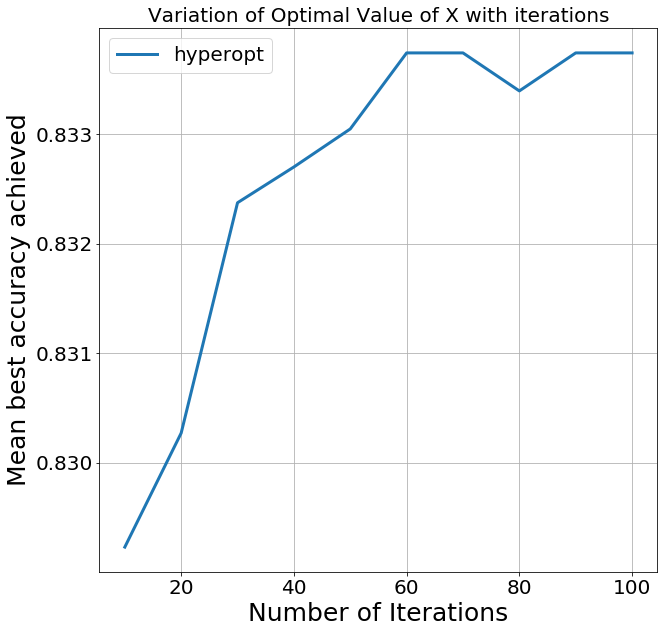

In [29]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))


plt.plot(plotting_itr,Y,label = 'hyperopt',linewidth=3.0) #x, y


plt.xlabel('Number of Iterations',fontsize=25)
plt.ylabel('Mean best accuracy achieved',fontsize=25)
plt.title('Variation of Optimal Value of X with iterations',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
#plt.yticks(np.arange(0.915, 0.925, step=0.005))
plt.legend(fontsize=20)
plt.show()

# Generating the final plots

In [1]:
Y_Random = [0.8275122549019608,
 0.827859477124183,
 0.8288807189542483,
 0.829575163398693,
 0.8299223856209151,
 0.8306168300653596,
 0.8310049019607844,
 0.8313521241830066,
 0.8316993464052288,
 0.832046568627451]

In [2]:
Y_hyperOpt=[0.8292279411764705,
 0.8302696078431373,
 0.8323733660130719,
 0.832700163398693,
 0.8330473856209151,
 0.8337418300653596,
 0.8337418300653596,
 0.8333946078431372,
 0.8337418300653596,
 0.8337418300653596]

In [3]:
Y_mango=[0.825857843137255,
 0.8289011437908498,
 0.8320057189542484,
 0.833047385620915,
 0.8333946078431372,
 0.8337418300653596,
 0.8337418300653596,
 0.8337418300653596,
 0.8337418300653596,
 0.8337418300653596]

In [4]:
Y_mango_batch=[0.8320567810457515,
 0.8337418300653594,
 0.8337418300653594,
 0.8337418300653594,
 0.8337418300653594,
 0.8337418300653594,
 0.8337418300653594,
 0.8337418300653594,
 0.8337418300653594,
 0.8337418300653594]

In [8]:
Y_mango_clustering=[0.833047385620915,
 0.8337418300653594,
 0.8337418300653594,
 0.8337418300653594,
 0.8337418300653594,
 0.8337418300653594,
 0.8337418300653594,
 0.8337418300653594,
 0.8337418300653594,
 0.8337418300653594]

In [5]:
plotting_itr =[10, 20,30,40,50,60,70,80,90,100]

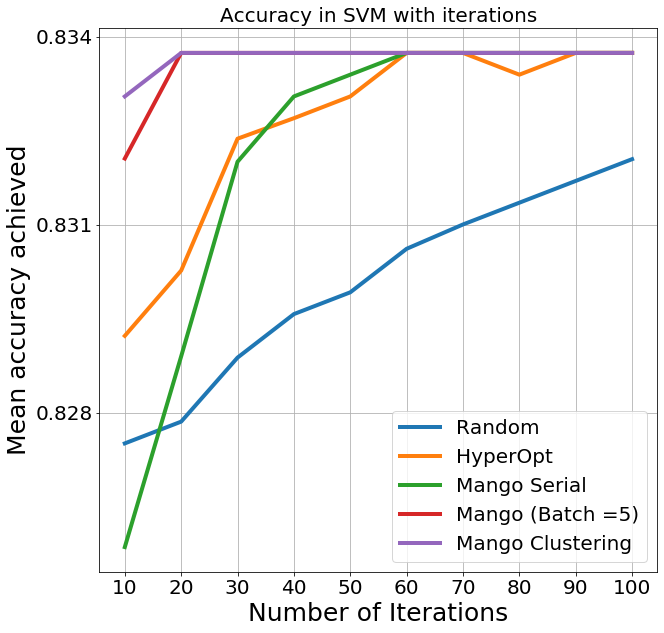

In [9]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))


plt.plot(plotting_itr,Y_Random,label = 'Random',linewidth=4.0) #x, y
plt.plot(plotting_itr,Y_hyperOpt,label = 'HyperOpt',linewidth=4.0) #x, y
plt.plot(plotting_itr,Y_mango,label = 'Mango Serial',linewidth=4.0) #x, y
plt.plot(plotting_itr,Y_mango_batch,label = 'Mango (Batch =5)',linewidth=4.0) #x, y
plt.plot(plotting_itr,Y_mango_clustering,label = 'Mango Clustering',linewidth=4.0) #x, y




plt.xlabel('Number of Iterations',fontsize=25)
plt.ylabel('Mean accuracy achieved',fontsize=25)
plt.title('Accuracy in SVM with iterations',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.yticks(np.arange(0.828, 0.835, step=0.003))
plt.xticks(np.arange(10, 110, step=10))
plt.legend(fontsize=20)
plt.show()